In [63]:
# Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize , word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Downloading nltk Stopwords and Wordnet
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Dataset1
Reading 1st datasets 

In [3]:
Dataset1 = pd.read_csv('news.csv')

In [4]:
Dataset1.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [5]:
Dataset1.tail()

Unnamed: 0                                              title  \
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL

In [6]:
Dataset1.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [7]:
Dataset1['Article'] = Dataset1['title']+Dataset1['text']

In [8]:
#Shuffle 100%
Dataset1.sample(frac=1)

Unnamed: 0                                              title  \
5242        8115                    Awakening from the Living Dream   
3832        6263  DNC To Sue Trump For Telling Truth: Trump Admi...   
4231       10424  Opps! German Magazine Uses ISIS Propaganda Vid...   
2562         951  What to watch at 's key Clinton-Sanders debate...   
59          1522  Donald Trump: Hillary Clinton has 'caused trem...   
...          ...                                                ...   
3296       10416  LEAKED BOMBSHELL: The Shocking Truth About Hil...   
3256        1913  Clinton struggles to contain media barrage on ...   
5033        5164  Donald Trump's Super Pac backers worry candida...   
1626        2883  John Kerry Says It's Unclear Whether Iran Deal...   
2153        2695        Reddit administrators accused of censorship   

                                                   text label  \
5242  Leave a reply \nFrank M. Wanderer – While drea...  FAKE   
3832  The DNC is suing the Republican National Commi...  FAKE   
4231  Taming the corporate media beast Opps! German ...  FAKE   
2562  New York (CNN) Hillary Clinton and Bernie Sand...  REAL   
59    Republican presidential front-runner Donald Tr...  REAL   
...                                                 ...   ...   
3296  It is DISTURBING to think that they have known...  FAKE   
3256  A verdict in 2017 could have sweeping conseque...  REAL   
5033  Super Pacs backing Donald Trump are off to a s...  REAL   
1626  SHARM EL-SHEIK, Egypt, March 14 (Reuters) - On...  REAL   
2153  Administrators at the popular online forum Red...  REAL   

                                                Article  
5242  Awakening from the Living DreamLeave a reply \...  
3832  DNC To Sue Trump For Telling Truth: Trump Admi...  
4231  Opps! German Magazine Uses ISIS Propaganda Vid...  
2562  What to watch at 's key Clinton-Sanders debate...  
59    Donald Trump: Hillary Clinton has 'caused trem...  
...                                                 ...  
3296  LEAKED BOMBSHELL: The Shocking Truth About Hil...  
3256  Clinton struggles to contain media barrage on ...  
5033  Donald Trump's Super Pac backers worry candida...  
1626  John Kerry Says It's Unclear Whether Iran Deal...  
2153  Reddit administrators accused of censorshipAdm...  

[6335 rows x 5 columns]

In [9]:
Dataset1.label[Dataset1.label == 'REAL'] = 1
Dataset1.label[Dataset1.label == 'FAKE'] = 0

C:\Users\vishw\AppData\Local\Temp/ipykernel_7236/818584941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'REAL'] = 1
C:\Users\vishw\AppData\Local\Temp/ipykernel_7236/818584941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'FAKE'] = 0


In [10]:
Dataset1 = Dataset1.loc[:,['Article','label']]
Dataset1 = Dataset1.dropna()

In [11]:
Dataset1

Article label
0     You Can Smell Hillary’s FearDaniel Greenfield,...     0
1     Watch The Exact Moment Paul Ryan Committed Pol...     0
2     Kerry to go to Paris in gesture of sympathyU.S...     1
3     Bernie supporters on Twitter erupt in anger ag...     0
4     The Battle of New York: Why This Primary Matte...     1
...                                                 ...   ...
6330  State Department says it can't find emails fro...     1
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...     0
6332  Anti-Trump Protesters Are Tools of the Oligarc...     0
6333  In Ethiopia, Obama seeks progress on peace, se...     1
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...     1

[6335 rows x 2 columns]

In this step we will clean the data that will be used for training. The cleaning will involve these steps- 1.Removing all the extra information like brackets, any kind of puctuations - commas, apostrophes, quotes, question marks, and more. 2.Remove all the numeric text, urls

In [12]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [13]:
# Applying the wordpre method to the dataset
Dataset1['Article'] = Dataset1['Article'].apply(wordpre)

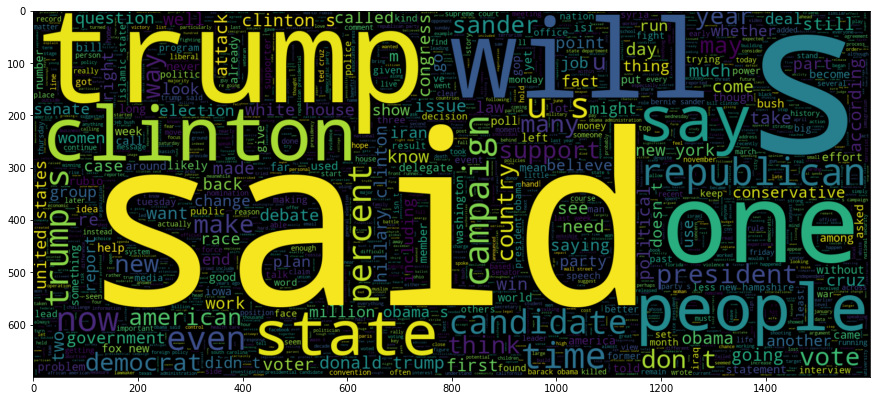

In [14]:
# word used in real news
plt.figure(figsize = (15,15))
wc=WordCloud(max_words = 2000, width=1600, height=700,stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label == 1].Article))
plt.imshow(wc,interpolation='bilinear')

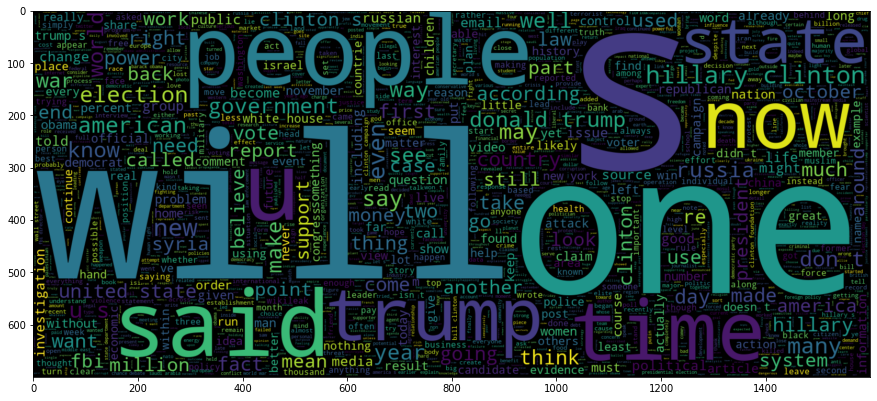

In [15]:
# word used in fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset2

In [16]:
Dataset2_true = pd.read_csv('True.csv')
Dataset2_fake = pd.read_csv('Fake.csv')

In [17]:
Dataset2_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [18]:
Dataset2_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [19]:
Dataset2_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [20]:
# counting by subject in real news
for key,count in Dataset2_true.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
# Getting total rwos
print(f"total Records:\t{Dataset2_true.shape[0]}")

politicsNews:	11272
worldnews:	10145
total Records:	21417


In [21]:
Dataset2_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [22]:
# Counting by subjects in fake news
for key,count in Dataset2_fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
# Getting total rows 
print(f"total records:\t{Dataset2_fake.shape[0]}")
    

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
total records:	23481


C:\Users\vishw\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


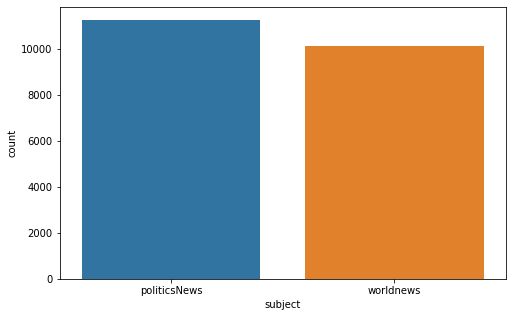

In [23]:
# Ploting the subjects in Real news
plt.figure(figsize=(8,5))
sns.countplot("subject", data=Dataset2_true)
plt.show()

C:\Users\vishw\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


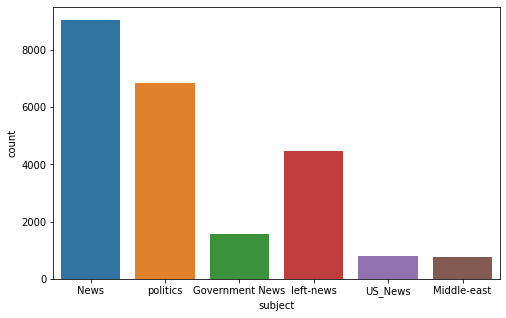

In [24]:
# ploting the subject in fake news
plt.figure(figsize=(8,5))
sns.countplot('subject', data=Dataset2_fake)
plt.show()

In [25]:
Dataset2_true['label'] = 1
Dataset2_fake['label'] = 0

In [26]:
Dataset2 = pd.concat([Dataset2_true, Dataset2_fake])

In [27]:
Dataset2.shape

(44898, 5)

In [28]:
Dataset2['Article'] = Dataset2['title'] + Dataset2['text']

In [29]:
Dataset2.sample(frac = 1)

title  \
14626  IF YOU’RE EASILY OFFENDED, Don’t Watch This Am...   
16498  In Kenya opposition stronghold, a repeat presi...   
11378  Donna Brazile FINALLY Admits To Giving Hillary...   
21718  WILL TAYLOR SWIFT “Bestie” AND LEFTIST WHO LIE...   
16770  U.S. carrier patrols off Korean peninsula in w...   
...                                                  ...   
6058   Pressured by Trump, Mexico ready to discuss NA...   
14579  LET’S MAKE A DEAL: CRUZ SUPER-PAC’S Will Make ...   
9753   BREAKING REPORT: HILLARY SUPPORTER, CEO Of Las...   
14930  New Orleans “Club” Advertises “Meet And Greet”...   
12262  Colombia urgently crafting law to allow crime ...   

                                                    text       subject  \
14626  You re gonna love this patriot! He speaks for ...      politics   
16498  KISUMU, Kenya (Reuters) - As Kenya prepared to...     worldnews   
11378  Veteran Democratic operative Donna Brazile fin...      politics   
21718   Misogyny is ingrained in people from the time...     left-news   
16770  ABOARD USS RONALD REAGAN, Sea of Japan (Reuter...     worldnews   
...                                                  ...           ...   
6058   MEXICO CITY (Reuters) - Under pressure from Pr...  politicsNews   
14579  Is this a deal Trump should take? If he walks ...      politics   
9753   On August 15, 2017, Jim Murren, CEO of MGM whi...      politics   
14930  Wow it looks like Dem candidate for governor, ...      politics   
12262  BOGOTA (Reuters) - Colombia s government is ur...     worldnews   

                     date  label  \
14626        Jan 19, 2016      0   
16498   October 25, 2017       1   
11378        Mar 17, 2017      0   
21718        May 20, 2015      0   
16770   October 19, 2017       1   
...                   ...    ...   
6058    January 24, 2017       1   
14579        Jan 28, 2016      0   
9753          Oct 4, 2017      0   
14930        Nov 15, 2015      0   
12262  December 14, 2017       1   

                                                 Article  
14626  IF YOU’RE EASILY OFFENDED, Don’t Watch This Am...  
16498  In Kenya opposition stronghold, a repeat presi...  
11378  Donna Brazile FINALLY Admits To Giving Hillary...  
21718  WILL TAYLOR SWIFT “Bestie” AND LEFTIST WHO LIE...  
16770  U.S. carrier patrols off Korean peninsula in w...  
...                                                  ...  
6058   Pressured by Trump, Mexico ready to discuss NA...  
14579  LET’S MAKE A DEAL: CRUZ SUPER-PAC’S Will Make ...  
9753   BREAKING REPORT: HILLARY SUPPORTER, CEO Of Las...  
14930  New Orleans “Club” Advertises “Meet And Greet”...  
12262  Colombia urgently crafting law to allow crime ...  

[44898 rows x 6 columns]

In [30]:
Dataset2 = Dataset2.loc[:,['Article','label']]

In [31]:
Dataset2

Article  label
0      As U.S. budget fight looms, Republicans flip t...      1
1      U.S. military to accept transgender recruits o...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...      1
3      FBI Russia probe helped by Australian diplomat...      1
4      Trump wants Postal Service to charge 'much mor...      1
...                                                  ...    ...
23476  McPain: John McCain Furious That Iran Treated ...      0
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...      0
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...      0
23479  How to Blow $700 Million: Al Jazeera America F...      0
23480  10 U.S. Navy Sailors Held by Iranian Military ...      0

[44898 rows x 2 columns]

In [32]:
# Applying the wordpre method to the dataset
Dataset2['Article'] = Dataset2['Article'].apply(wordpre)

In [33]:
Dataset2.head()

Article  label
0  as u s  budget fight looms  republicans flip t...      1
1  u s  military to accept transgender recruits o...      1
2  senior u s  republican senator   let mr  muell...      1
3  fbi russia probe helped by australian diplomat...      1
4  trump wants postal service to charge  much mor...      1

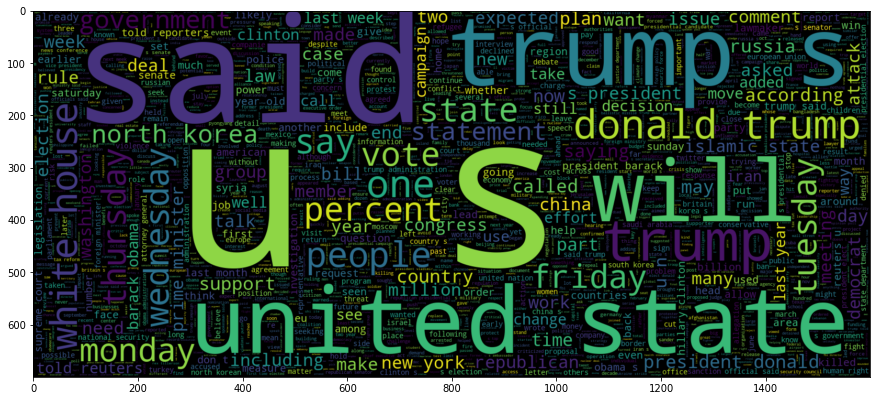

In [34]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

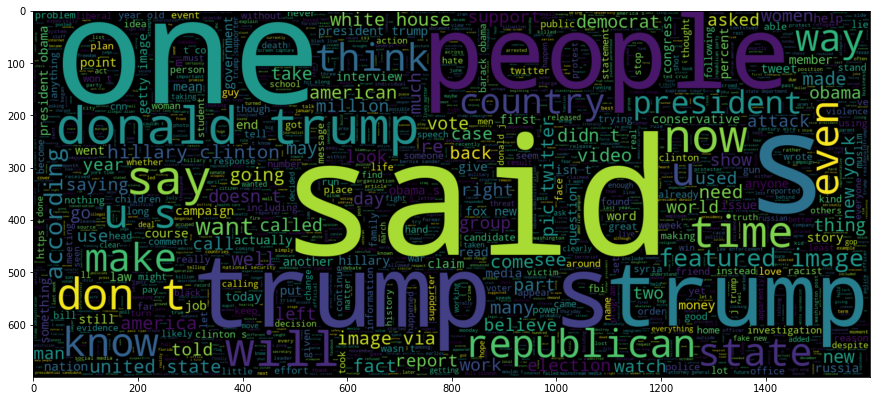

In [35]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 3

In [36]:
Dataset3_real = pd.read_csv('politifact_real.csv')
Dataset3_fake = pd.read_csv('politifact_fake.csv')

In [37]:
Dataset3_real['label']= 1
Dataset3_fake['label']= 0
Dataset3 = pd.concat([Dataset3_real, Dataset3_fake])
Dataset3["Article"] = Dataset3["title"]
Dataset3.sample(frac = 1) #Shuffle 100%
Dataset3 = Dataset3.loc[:,['Article','label']]

In [38]:
Dataset3

Article  label
0          National Federation of Independent Business      1
1                          comments in Fayetteville NC      1
2    Romney makes pitch, hoping to close deal : Ele...      1
3    Democratic Leaders Say House Democrats Are Uni...      1
4      Budget of the United States Government, FY 2008      1
..                                                 ...    ...
427        Who is affected by the government shutdown?      0
428  Lindsey Graham Threatens To Convert To Democra...      0
429  ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...      0
430  Sarah Palin Calls To Boycott Mall Of America B...      0
431                                  Account Suspended      0

[1056 rows x 2 columns]

In [39]:
# Applying the wordpre method to the dataset
Dataset3['Article'] = Dataset3['Article'].apply(wordpre)

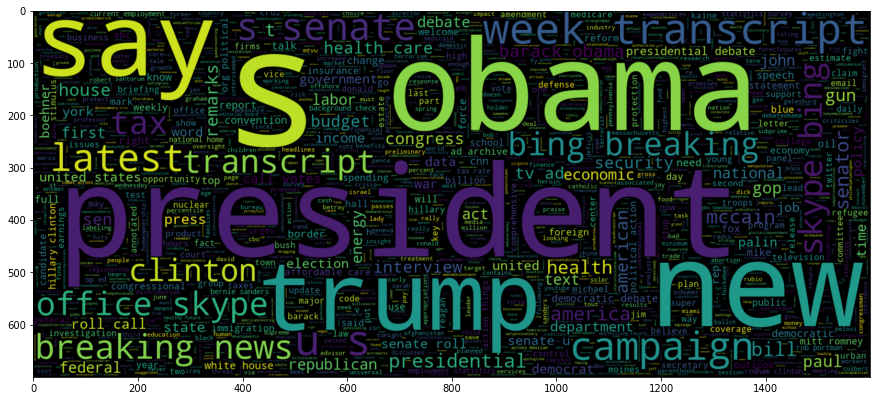

In [40]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

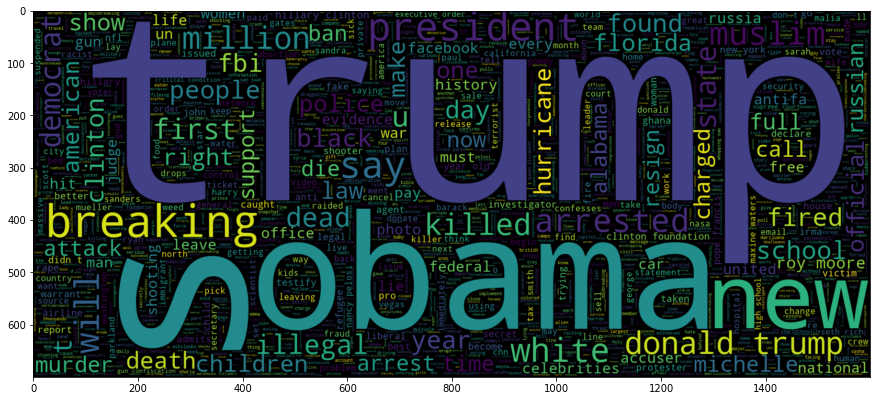

In [41]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 4

In [42]:
Dataset4 = pd.read_csv('train.csv')

In [43]:
Dataset4.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [44]:
Dataset4['Article'] = Dataset4['title'] + Dataset4['text']
Dataset4.sample(frac = 1)
Dataset4 = Dataset4.loc[:,['Article','label']]
Dataset4 = Dataset4.dropna()

In [45]:
##  Applying the wordpre method to the dataset
Dataset4['Article']=Dataset4['Article'].apply(wordpre)

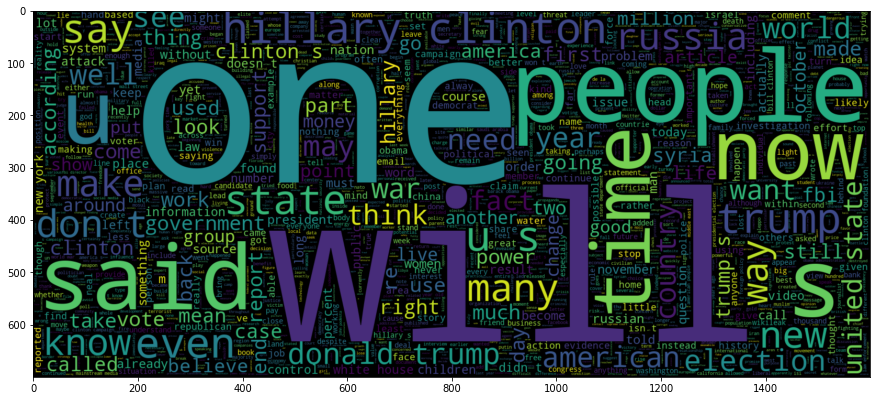

In [46]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

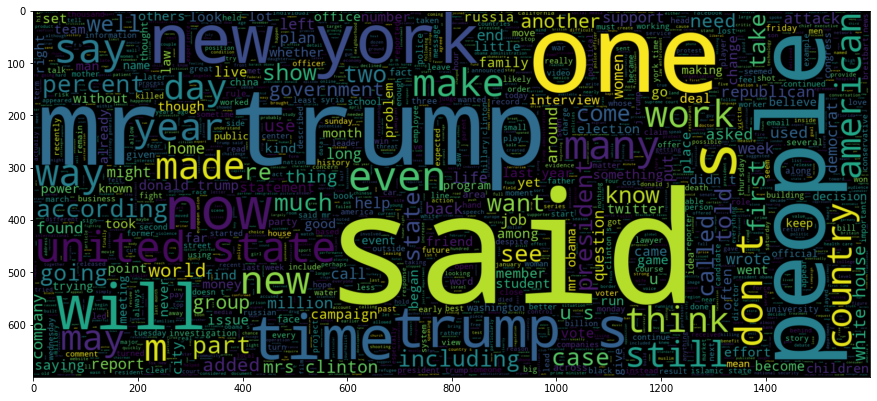

In [47]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

  # Dataset 5

In [48]:
Dataset5 = pd.read_csv('data.csv')

In [49]:
Dataset5.head()

URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singer Jason Aldean, who was performin...      1

In [50]:
Dataset5["Article"] = Dataset5["Headline"] + Dataset5["Body"]
Dataset5["label"] = Dataset5["Label"]
Dataset5.sample(frac = 1) #Shuffle 100%
Dataset5 = Dataset5.loc[:,['Article','label']]
Dataset5 = Dataset5.dropna()

In [51]:
##  Applying the wordpre method to the dataset
Dataset5['Article']=Dataset5['Article'].apply(wordpre)

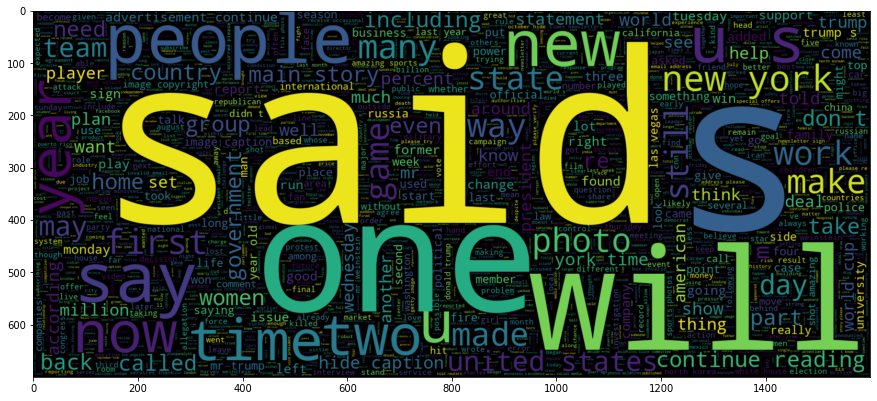

In [52]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

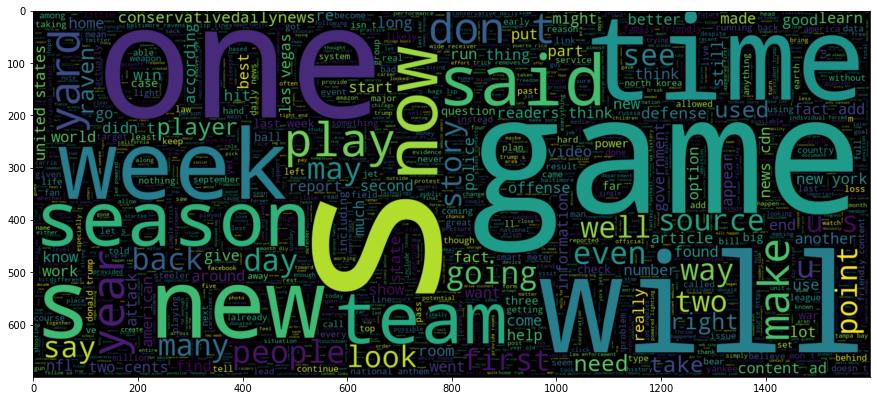

In [53]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

### Combining all the dataset into one

In [55]:
frames = [Dataset1,Dataset2,Dataset3,Dataset4,Dataset5]
Dataset = pd.concat(frames)

In [56]:
Dataset.shape

(76480, 2)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(Dataset['Article'], Dataset['label'], test_size=0.2, random_state=2020)

In [58]:
x_train.shape

(61184,)

In [65]:
x_train.head()

12743    serbian president says serbia does not plan to...
1797      this guy predicted trump s win  and what he h...
4984      donald trump gets mercilessly mocked for call...
19786    wow  hillary took state department furniture t...
20418    not news   dead  wounded in obama s hometown i...
Name: Article, dtype: object

In [59]:
x_test.shape

(15296,)

In [60]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

### LogisticRegression

In [64]:
pipe = Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',LogisticRegression())])
Logisticmodel = pipe.fit(x_train,y_train)
prediction = Logisticmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test,prediction)*100,2)))
Logisticmodel_accuracy = round(accuracy_score(y_test,prediction)*100,2)

accuracy: 87.05%


### DecisionTreeClassifier

In [66]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])
DecisionTreemodel = pipe.fit(x_train, y_train)
prediction = DecisionTreemodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
DecisionTreemodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 82.07%


### RandomForestClassifier

In [67]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

RandomForestmodel = pipe.fit(x_train, y_train) 
prediction = RandomForestmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
RandomForestmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

KeyboardInterrupt: 

### Stochastic Gradient Descent

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])
SGDmodel = pipe.fit(x_train, y_train)
prediction = SGDmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
SDGmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

GBCmodel = pipe.fit(x_train, y_train)
prediction = GBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
GBCmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

### XGBClassifier

In [ ]:
from xgboost import XGBClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

xgboostmodel = pipe.fit(x_train, y_train)
prediction = xgboostmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
xgboostmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

### Multinomial Naive Bayes Classifier

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

MNBCmodel = pipe.fit(x_train, y_train)
prediction = MNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Multinomial_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

### Bernoulli Naive Bayes Classifier

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

BNBCmodel = pipe.fit(x_train, y_train)
prediction = BNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Bernoulli_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
x = ["SDGmodel_accuracy", "Logisticmodel_accuracy", "GBCmodel_accuracy", "xgboostmodel_accuracy" , 
     "DecisionTreemodel_accuracy","RandomForestmodel_accuracy","Multinomial_Naive_Bayes_accuracy",
     "Bernoulli_Naive_Bayes_accuracy"]
y =  [SDGmodel_accuracy,Logisticmodel_accuracy,GBCmodel_accuracy,xgboostmodel_accuracy,
      DecisionTreemodel_accuracy,RandomForestmodel_accuracy,Multinomial_Naive_Bayes_accuracy,
      Bernoulli_Naive_Bayes_accuracy]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))